<a href="https://colab.research.google.com/github/onurerdogan2001/ie423tasks/blob/main/notebooks/task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

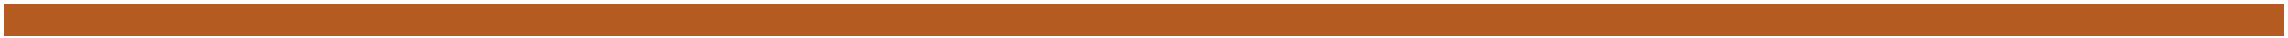

## <font color='#475468'> IE423 TASK 7 :</font>
### <font color='#475468'> Onur Erdoğan 21903313</font>

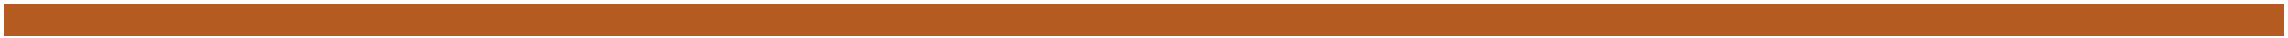

## Initialize

In [2]:
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Load Data

Remember the retail transactions data set that we used for customer segmentation...

In [3]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dfRet = pd.read_csv('/content/drive/MyDrive/yazokulu/sales.csv', encoding = "ISO-8859-1")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
dfRet.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Prepare Data

In order to extract relationships between items, the data is first rearranged into a binary table where each transaction is a row, each column is an item, and the values are set to 1 if the item was part of the transaction.

In [6]:
dfRet['Purchase_ID'] = dfRet.groupby('User_ID').ngroup().astype(str)

# Display the result
dfRet.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Purchase_ID
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,1


In [7]:
# Drop missing values
dfRet.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Convert to list format
dfRetList=dfRet.groupby('Purchase_ID').Product_ID.apply(list)
dfRetList

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Purchase_ID
0       [P00248942, P00085942, P00102642, P00110842, P...
1       [P00289342, P00034742, P00177442, P00116842, P...
10      [P00110842, P00216342, P00116842, P00119742, P...
100     [P00071242, P00050442, P0097342, P00165442, P0...
1000    [P00148642, P00086042, P00102342, P00087042, P...
                              ...                        
995     [P00037142, P00010742, P00127642, P00006942, P...
996     [P00037142, P00221442, P0095542, P00035942, P0...
997     [P00295942, P00085242, P00057742, P00248942, P...
998     [P00117042, P00284842, P00148542, P00010742, P...
999     [P00113842, P00351142, P00169742, P00008042, P...
Name: Product_ID, Length: 5870, dtype: object

## Build Model

### Association Rule Mining

In [10]:
# Encode data as transaction matrix
from mlxtend.preprocessing import TransactionEncoder

mdlRetTe = TransactionEncoder()
mdlRetTe_array = mdlRetTe.fit(dfRetList).transform(dfRetList)
dfRtb = pd.DataFrame(mdlRetTe_array, columns=mdlRetTe.columns_)
dfRtb

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,P00000142,P00000242,P00000642,P00001042,P00001142,P00001542,P00002142,P00002242,P00003442,P00004242,...,P0096442,P0096542,P0096642,P0096742,P0096842,P0097342,P0099042,P0099742,P0099842,P0099942
0,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5865,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
5866,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
5867,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5868,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
!pip3 install mlxtend --upgrade

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
%%time
# Speed up by using pattern fragment growth method for mining frequent itemsets (uses density to find good itemsets)

from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets = fpgrowth(dfRtb, min_support=0.01, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 2min 6s, sys: 579 ms, total: 2min 6s
Wall time: 2min 9s


,support,itemsets
0,0.275128,(P00025442)
1,0.245315,(P00184942)
2,0.239523,(P00059442)
3,0.218228,(P00110842)
4,0.212266,(P00102642)
...,...,...
206858,0.010562,"(P00059442, P00207342)"
206859,0.010221,"(P00080342, P00207342)"
206860,0.010051,"(P00207342, P00105142)"
206861,0.011073,"(P00207342, P00001142)"


In [13]:
# Evaluate the metrics, and filter the items and itemsets that have at least 70% confidence

from mlxtend.frequent_patterns import association_rules

a_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
a_rules.sort_values(by=['confidence'],ascending=False,inplace=True)
a_rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
100,"(P00243942, P00122442, P00073842)",(P00057642),0.014140,0.250426,0.010733,0.759036,3.030981,0.007192,3.110733,0.679684
68,"(P00000142, P00277642, P00129342)",(P00145042),0.013969,0.239523,0.010562,0.756098,3.156680,0.007216,3.117956,0.692891
48,"(P00155442, P00209742)",(P00112542),0.016525,0.192675,0.012436,0.752577,3.905949,0.009252,3.262940,0.756481
101,"(P00222942, P00032042)",(P00145042),0.014991,0.239523,0.011244,0.750000,3.131223,0.007653,3.041908,0.690995
46,"(P00245642, P00112142, P00144642)",(P00110742),0.013629,0.274617,0.010221,0.750000,2.731079,0.006479,2.901533,0.642602


So, from the first row we see that if someone purchases (P00243942, P00122442, P00073842), then they would also purchase P00057642 with 76% confidence.

If someone purchases (P00000142, P00277642, P00129342), then they would also purchase P00145042 w,th 75.6% confidence. This goes on.


